## 3D filtering

Used constrained embedding to filter the merges. The proposed molecules are embedded while constraining the atoms that came from their respective fragment A and fragment B (3D coordinates for these atoms are added from the original mol files). This filters out many molecules with bad conformations as the embedding will fail.

## Imports

In [6]:
from rdkit import Chem
from rdkit.Chem import Draw, PandasTools
import pandas as pd

sys.path.insert(1, '/home/sabsr3/xchem/fragment_network_merges/scripts')
from EmbeddingFilter import *

## Filter

The original fragment A and fragment B molecules are used as their 3D coordinates are needed for the embedding. The following code adds their filenames to the dataframe.

In [2]:
df = pd.read_csv('/home/sabsr3/xchem/fragment_network_merges/data/filtered/descriptorFiltered.csv')
df

,Merge,Fragment A ID,Fragment A smiles,Fragment B ID,Fragment B smiles,Synthon,Smiles,Target ID,Target smiles
0,x0107_x0678t,x0107,CC(=O)Nc1cnccc1C,x0678,NC(=O)CC1CCCCC1,NC(=O)C[Xe],NC(=O)Cc1ncc2c(n1)CCCCC2=O,x0678,O=C(CC1CCCCC1)Nc1cccnc1
1,x0107_x0678t,x0107,CC(=O)Nc1cnccc1C,x0678,NC(=O)CC1CCCCC1,NC(=O)C[Xe],NC(=O)CN1CCC2(C1)CC1(C2)OCCO1,x0678,O=C(CC1CCCCC1)Nc1cccnc1
2,x0107_x0678t,x0107,CC(=O)Nc1cnccc1C,x0678,NC(=O)CC1CCCCC1,NC(=O)C[Xe],NC(=O)CN1CCNc2cc3c(cc21)OCCO3,x0678,O=C(CC1CCCCC1)Nc1cccnc1
3,x0107_x0678t,x0107,CC(=O)Nc1cnccc1C,x0678,NC(=O)CC1CCCCC1,NC(=O)C[Xe],NC(=O)CN1C(=O)c2ccccc2Oc2ncccc21,x0678,O=C(CC1CCCCC1)Nc1cccnc1
4,x0107_x0678t,x0107,CC(=O)Nc1cnccc1C,x0678,NC(=O)CC1CCCCC1,NC(=O)C[Xe],NC(=O)Cc1nc2sc3c(c2c(=O)[nH]1)CCCC3,x0678,O=C(CC1CCCCC1)Nc1cccnc1
...,...,...,...,...,...,...,...,...,...
54450,x0107_x1382,x0107,CC(=O)Nc1cnccc1C,x1382,CC(NC(=O)CCl)c1cccc(Cl)c1,[Xe]c1cccc([Xe])c1,COCc1cccc(CC(=O)Nc2cnccc2C)c1,x2646,Cc1ccncc1NC(=O)Cc1cccc(Cl)c1
54451,x0107_x1382,x0107,CC(=O)Nc1cnccc1C,x1382,CC(NC(=O)CCl)c1cccc(Cl)c1,[Xe]c1cccc([Xe])c1,CC(=O)Nc1cccc(CN2CC3C4CCC(O4)C3C2)c1,x2646,Cc1ccncc1NC(=O)Cc1cccc(Cl)c1
54452,x0107_x1382,x0107,CC(=O)Nc1cnccc1C,x1382,CC(NC(=O)CCl)c1cccc(Cl)c1,[Xe]c1cccc([Xe])c1,Cc1cccc(CC(=O)Nc2ccc3[nH]c(=O)[nH]c3c2)c1,x2646,Cc1ccncc1NC(=O)Cc1cccc(Cl)c1
54453,x0107_x1382,x0107,CC(=O)Nc1cnccc1C,x1382,CC(NC(=O)CCl)c1cccc(Cl)c1,[Xe]c1cccc([Xe])c1,CC(=O)Nc1cccc(CN2CCC3(CCOC3)C2)c1,x2646,Cc1ccncc1NC(=O)Cc1cccc(Cl)c1


In [4]:
path = '/home/sabsr3/xchem/fragment_network_merges/data/Mpro/aligned/Mpro-FRAG_0A/Mpro-FRAG_0A.mol'

def get_filepaths(frag):
    return path.replace('FRAG', frag)

df['Fragment A file'] = df.apply(lambda x: get_filepaths(x['Fragment A ID']), axis=1)
df['Fragment B file'] = df.apply(lambda x: get_filepaths(x['Fragment B ID']), axis=1)

In [9]:
PandasTools.AddMoleculeColumnToFrame(df, smilesCol='Smiles', molCol='Molecules')
PandasTools.AddMoleculeColumnToFrame(df, smilesCol='Synthon', molCol='Synthon molecules')

,Merge,Fragment A ID,Fragment A smiles,Fragment B ID,Fragment B smiles,Synthon,Smiles,Target ID,Target smiles,Fragment A file,Fragment B file,Molecules,Synthon molecules
0,x0107_x0678t,x0107,CC(=O)Nc1cnccc1C,x0678,NC(=O)CC1CCCCC1,NC(=O)C[Xe],NC(=O)Cc1ncc2c(n1)CCCCC2=O,x0678,O=C(CC1CCCCC1)Nc1cccnc1,/home/sabsr3/xchem/fragment_network_merges/dat...,/home/sabsr3/xchem/fragment_network_merges/dat...,,
1,x0107_x0678t,x0107,CC(=O)Nc1cnccc1C,x0678,NC(=O)CC1CCCCC1,NC(=O)C[Xe],NC(=O)CN1CCC2(C1)CC1(C2)OCCO1,x0678,O=C(CC1CCCCC1)Nc1cccnc1,/home/sabsr3/xchem/fragment_network_merges/dat...,/home/sabsr3/xchem/fragment_network_merges/dat...,,
2,x0107_x0678t,x0107,CC(=O)Nc1cnccc1C,x0678,NC(=O)CC1CCCCC1,NC(=O)C[Xe],NC(=O)CN1CCNc2cc3c(cc21)OCCO3,x0678,O=C(CC1CCCCC1)Nc1cccnc1,/home/sabsr3/xchem/fragment_network_merges/dat...,/home/sabsr3/xchem/fragment_network_merges/dat...,,
3,x0107_x0678t,x0107,CC(=O)Nc1cnccc1C,x0678,NC(=O)CC1CCCCC1,NC(=O)C[Xe],NC(=O)CN1C(=O)c2ccccc2Oc2ncccc21,x0678,O=C(CC1CCCCC1)Nc1cccnc1,/home/sabsr3/xchem/fragment_network_merges/dat...,/home/sabsr3/xchem/fragment_network_merges/dat...,,
4,x0107_x0678t,x0107,CC(=O)Nc1cnccc1C,x0678,NC(=O)CC1CCCCC1,NC(=O)C[Xe],NC(=O)Cc1nc2sc3c(c2c(=O)[nH]1)CCCC3,x0678,O=C(CC1CCCCC1)Nc1cccnc1,/home/sabsr3/xchem/fragment_network_merges/dat...,/home/sabsr3/xchem/fragment_network_merges/dat...,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...
54450,x0107_x1382,x0107,CC(=O)Nc1cnccc1C,x1382,CC(NC(=O)CCl)c1cccc(Cl)c1,[Xe]c1cccc([Xe])c1,COCc1cccc(CC(=O)Nc2cnccc2C)c1,x2646,Cc1ccncc1NC(=O)Cc1cccc(Cl)c1,/home/sabsr3/xchem/fragment_network_merges/dat...,/home/sabsr3/xchem/fragment_network_merges/dat...,,
54451,x0107_x1382,x0107,CC(=O)Nc1cnccc1C,x1382,CC(NC(=O)CCl)c1cccc(Cl)c1,[Xe]c1cccc([Xe])c1,CC(=O)Nc1cccc(CN2CC3C4CCC(O4)C3C2)c1,x2646,Cc1ccncc1NC(=O)Cc1cccc(Cl)c1,/home/sabsr3/xchem/fragment_network_merges/dat...,/home/sabsr3/xchem/fragment_network_merges/dat...,,
54452,x0107_x1382,x0107,CC(=O)Nc1cnccc1C,x1382,CC(NC(=O)CCl)c1cccc(Cl)c1,[Xe]c1cccc([Xe])c1,Cc1cccc(CC(=O)Nc2ccc3[nH]c(=O)[nH]c3c2)c1,x2646,Cc1ccncc1NC(=O)Cc1cccc(Cl)c1,/home/sabsr3/xchem/fragment_network_merges/dat...,/home/sabsr3/xchem/fragment_network_merges/dat...,,
54453,x0107_x1382,x0107,CC(=O)Nc1cnccc1C,x1382,CC(NC(=O)CCl)c1cccc(Cl)c1,[Xe]c1cccc([Xe])c1,CC(=O)Nc1cccc(CN2CCC3(CCOC3)C2)c1,x2646,Cc1ccncc1NC(=O)Cc1cccc(Cl)c1,/home/sabsr3/xchem/fragment_network_merges/dat...,/home/sabsr3/xchem/fragment_network_merges/dat...,,

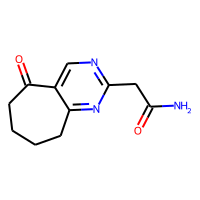
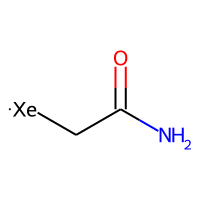
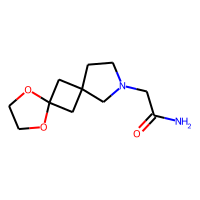
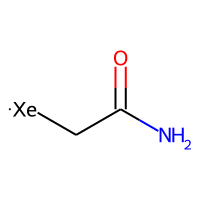
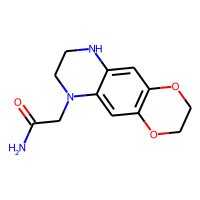
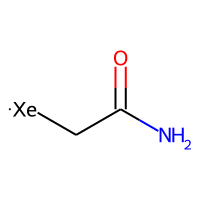
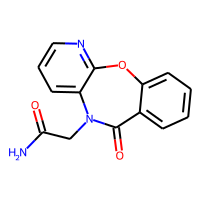
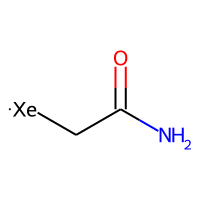
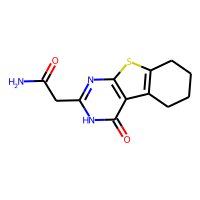
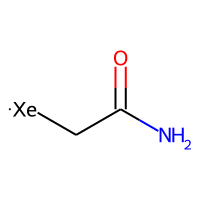
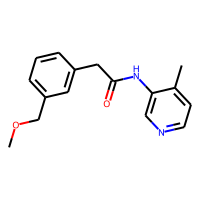
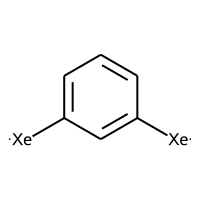
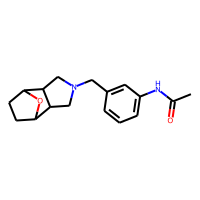
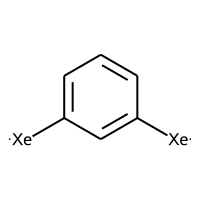
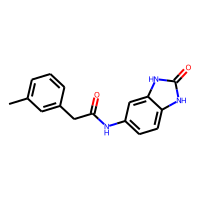
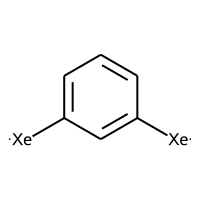
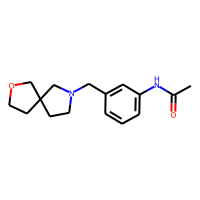
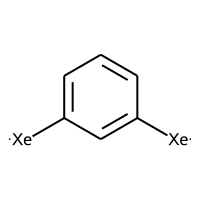
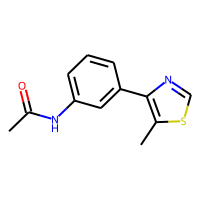
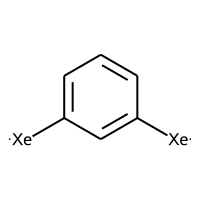

In [10]:
df

Run the constrained embedding - will automatically filter the dataframe for the successfully embedded molecules.

In [ ]:
embedding = ConstrainedEmbeddingDf(df)
embedded_df = embedding.filter_df()